In [1]:
import gymnasium as gym
import numpy as np

def compute_value_function(env, policy, gamma=1.0, theta=1e-10):
    """
    Обчислює функцію цінності для даної політики
    """
    value_table = np.zeros(env.observation_space.n)
    while True:
        updated_value_table = np.copy(value_table)
        for state in range(env.observation_space.n):
            action = int(policy[state])
            value_table[state] = sum([
                trans_prob * (reward_prob + gamma * updated_value_table[next_state])
                for trans_prob, next_state, reward_prob, _ in env.unwrapped.P[state][action]  # Фікс
            ])
        if np.max(np.abs(updated_value_table - value_table)) < theta:
            break
    return value_table


In [4]:
def extract_policy(env, value_table, gamma=1.0):
    """
    Витягує оптимальну політику з функції цінності
    """
    policy = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            Q_table[action] = sum([
                trans_prob * (reward_prob + gamma * value_table[next_state])
                for trans_prob, next_state, reward_prob, _ in env.unwrapped.P[state][action]  # Фікс
            ])
        policy[state] = np.argmax(Q_table)
    return policy


In [5]:
def policy_iteration(env, gamma=1.0):
    """
    Виконує ітерацію за політиками
    """
    # policy = np.random.choice(env.action_space.n, env.observation_space.n)
    policy = np.zeros(env.observation_space.n)
    while True:
        value_function = compute_value_function(env, policy, gamma)
        new_policy = extract_policy(env, value_function, gamma)
        if np.all(policy == new_policy):
            break
        policy = new_policy
    return policy, value_function


In [6]:
import matplotlib.pyplot as plt

def matplot_render_frame(img):
    plt.imshow(img)
    plt.axis('off')  # Вимкнути вісі
    plt.show()

def show_render(env, policy):
    """
    Візуалізує отриману оптимальну політику
    """
    #env = gym.make("FrozenLake-v1", render_mode="human", map_name="4x4")
    state, _ = env.reset()
    done = False

    matplot_render_frame(env.render())
    while not done:
        action = int(policy[state])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated  # поєднуємо варіанти завершення
        matplot_render_frame(env.render())

    env.close()


Оптимальна політика: [0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.] [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]


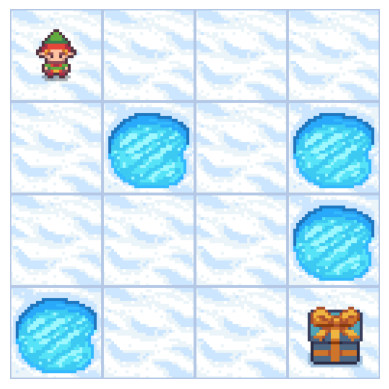

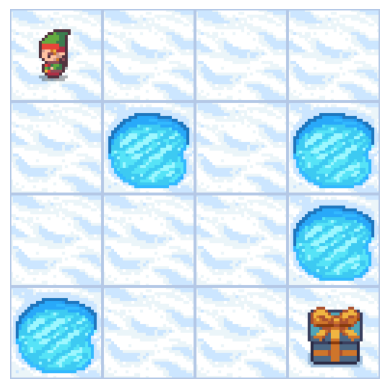

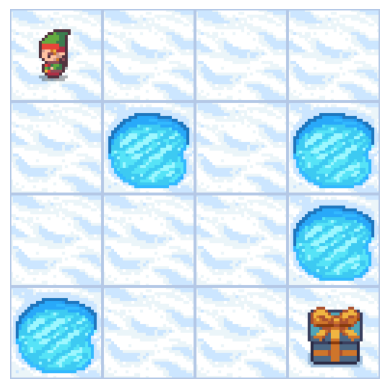

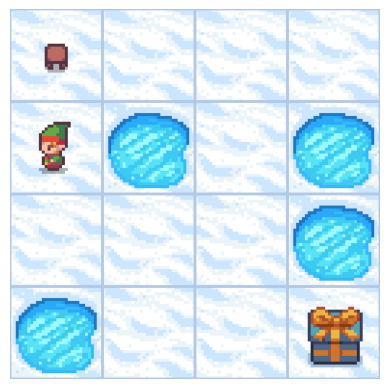

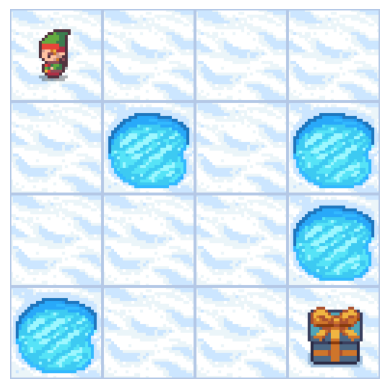

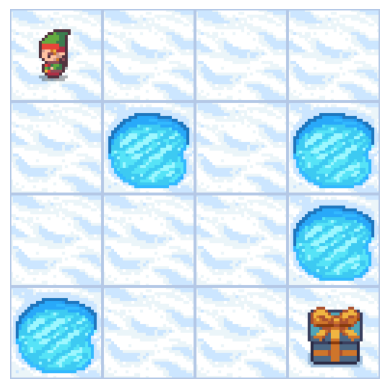

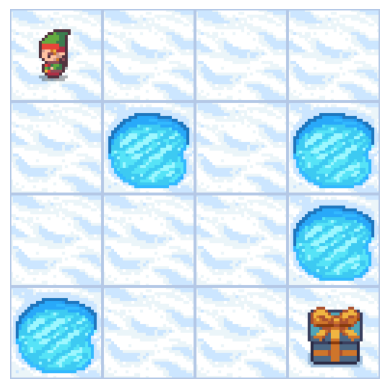

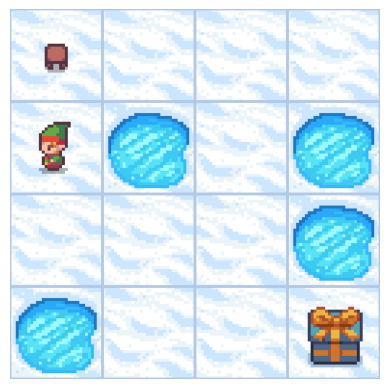

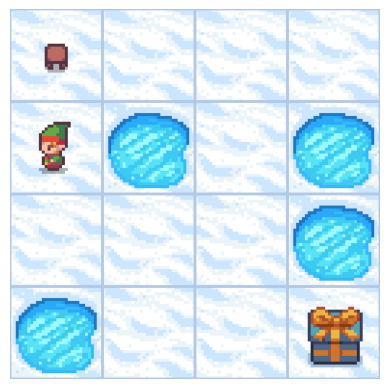

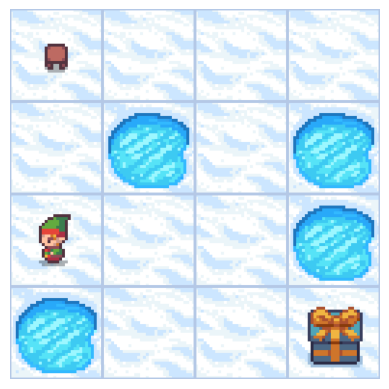

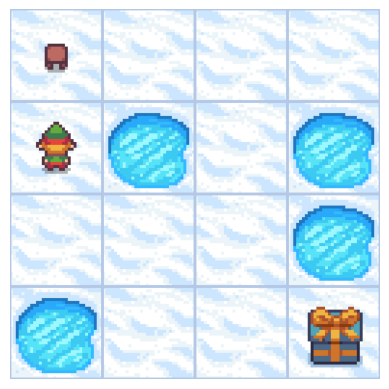

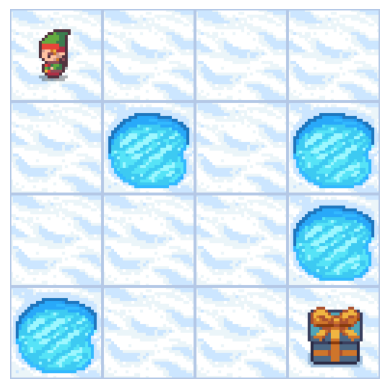

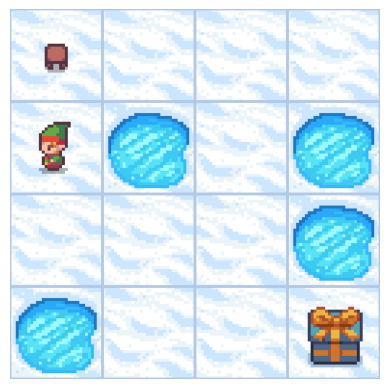

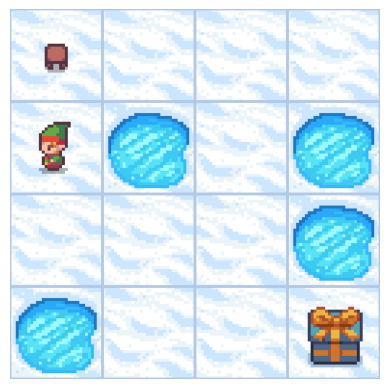

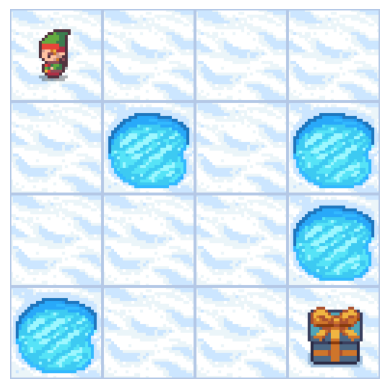

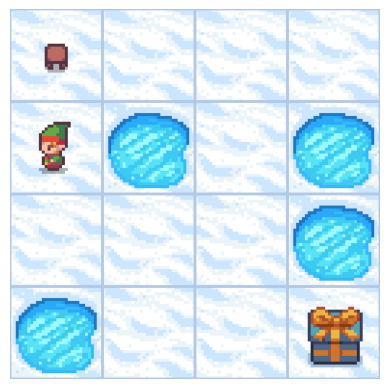

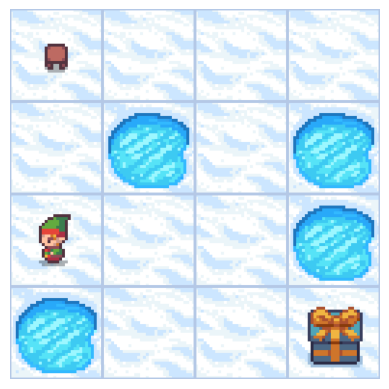

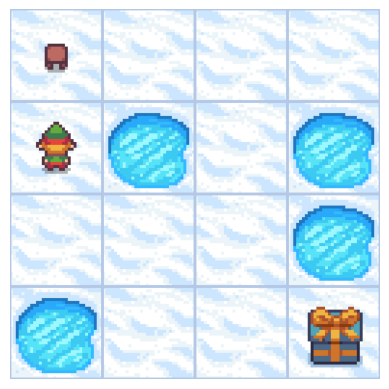

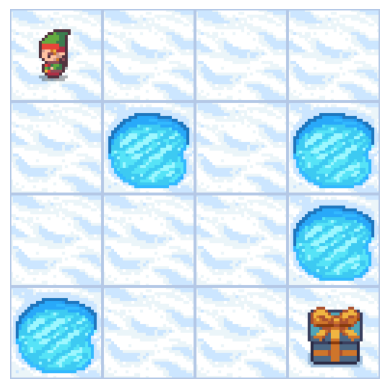

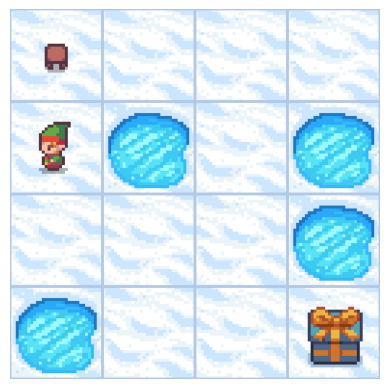

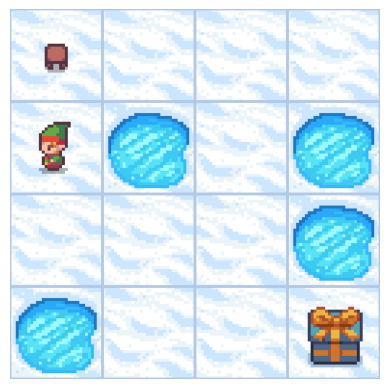

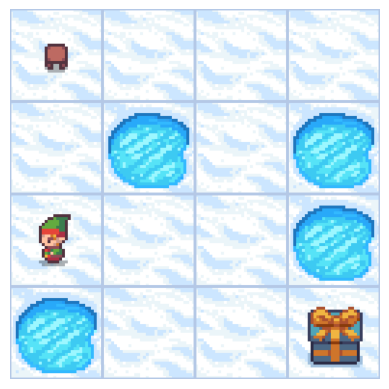

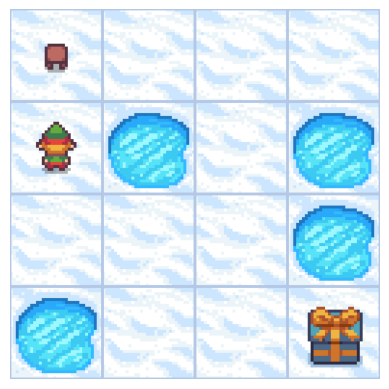

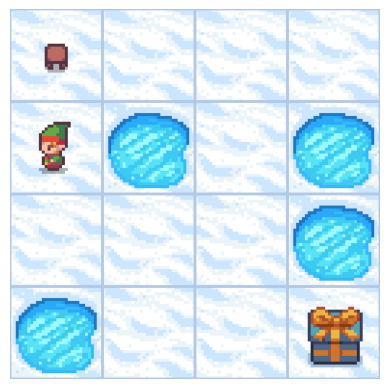

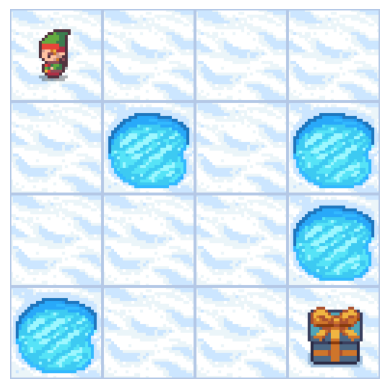

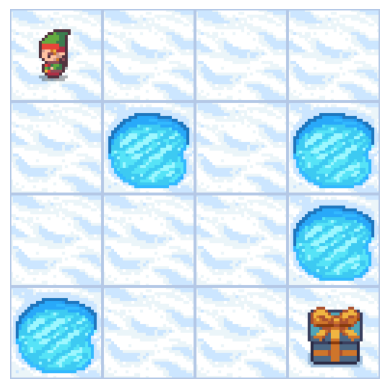

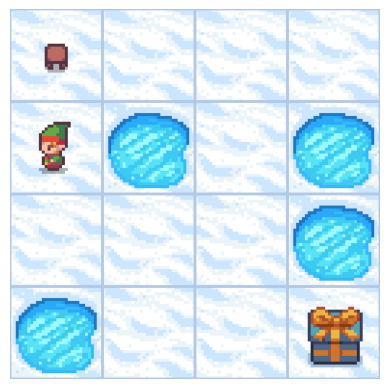

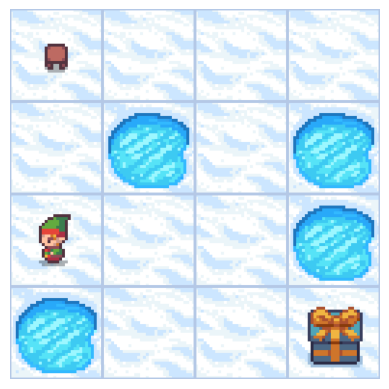

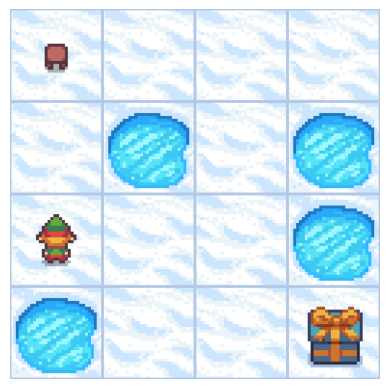

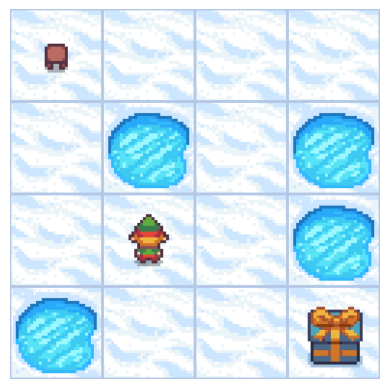

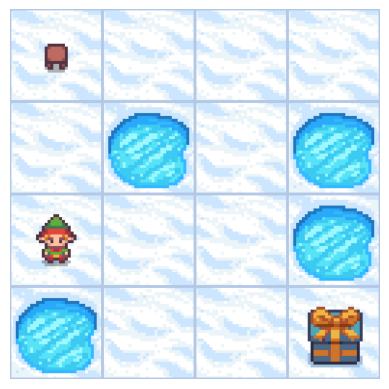

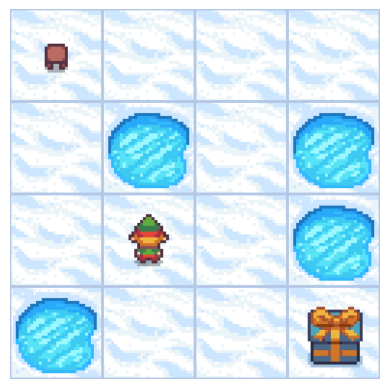

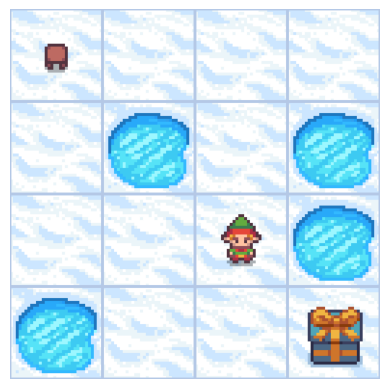

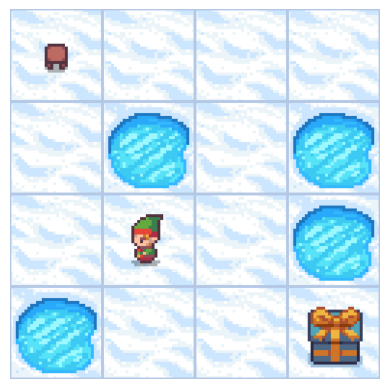

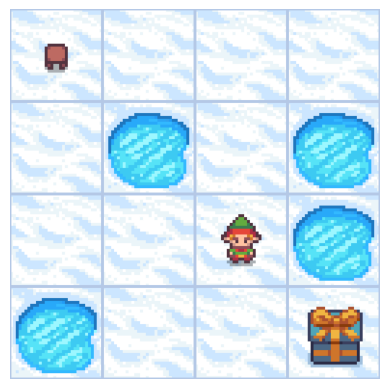

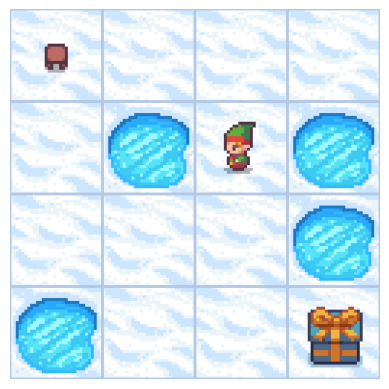

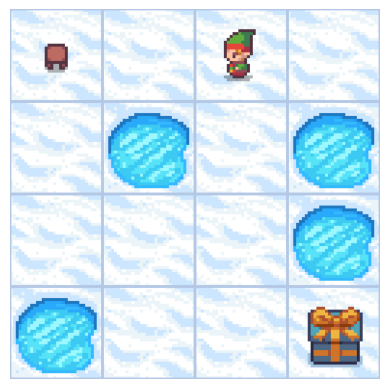

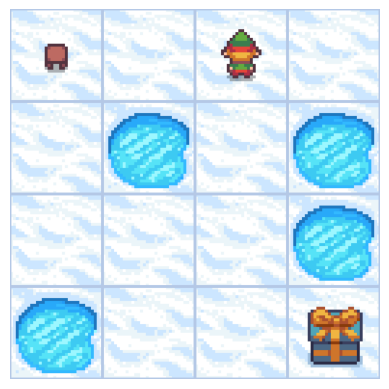

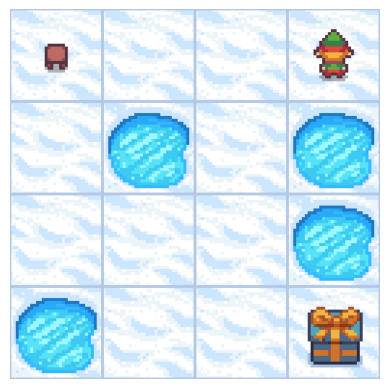

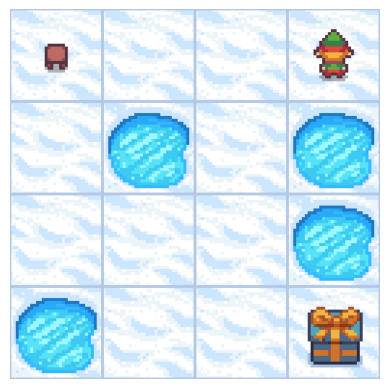

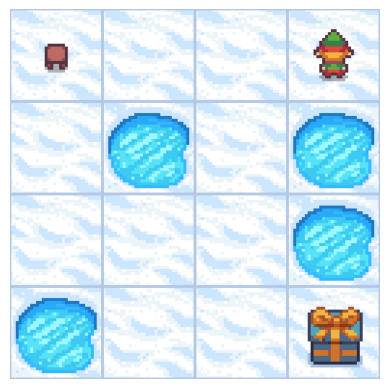

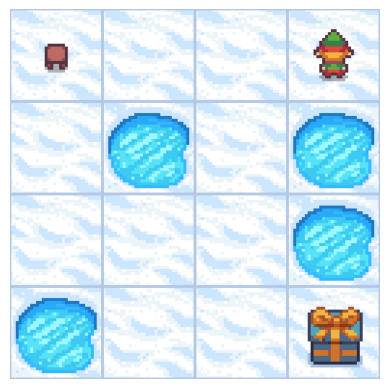

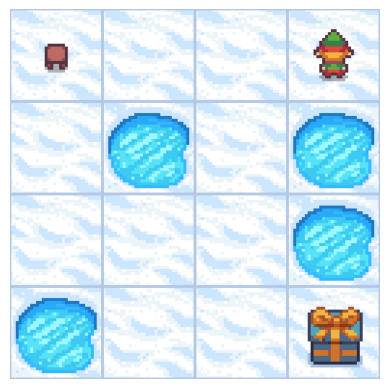

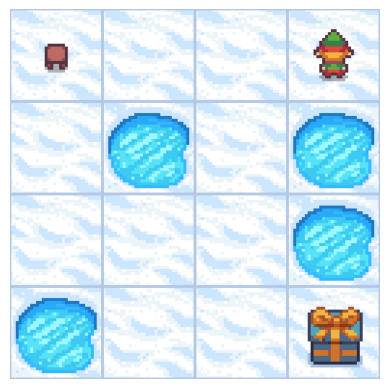

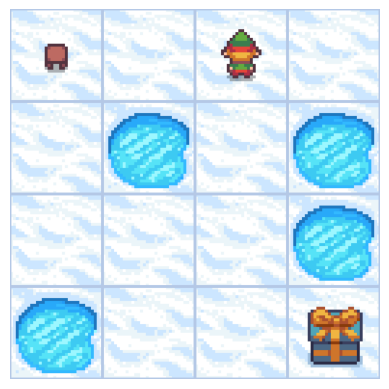

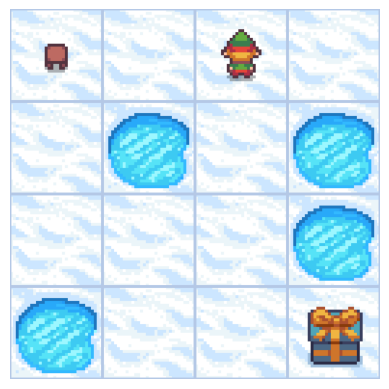

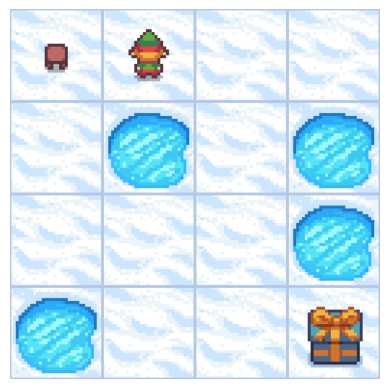

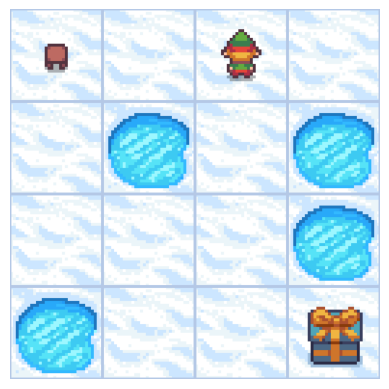

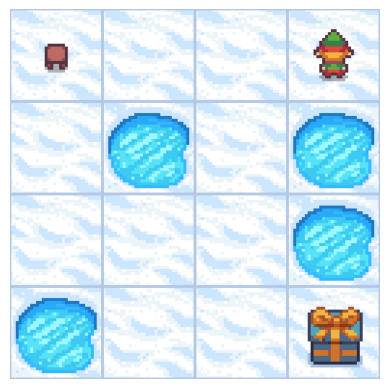

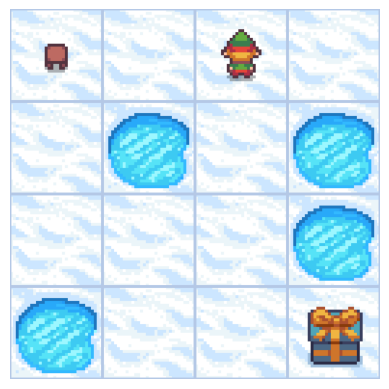

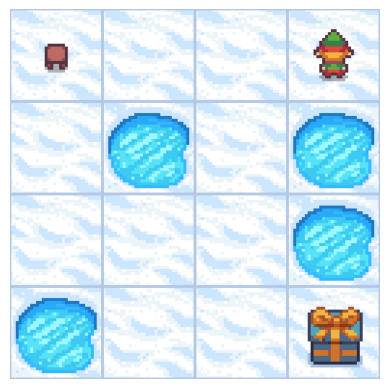

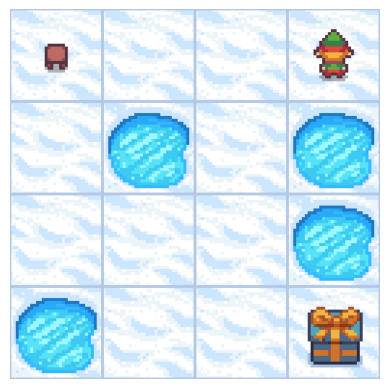

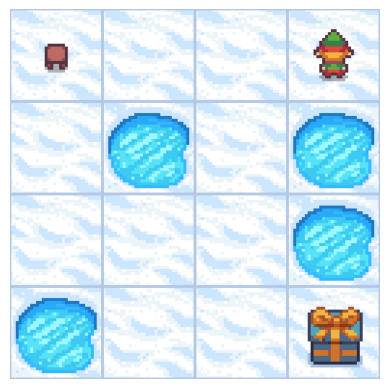

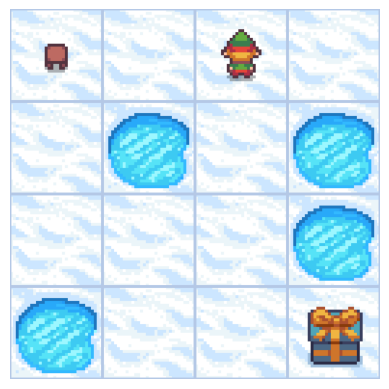

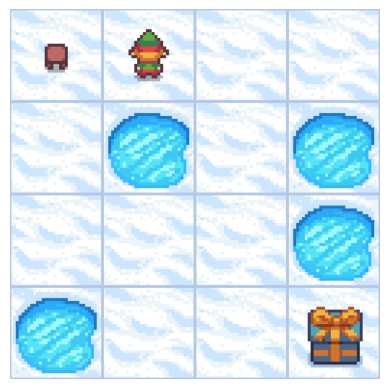

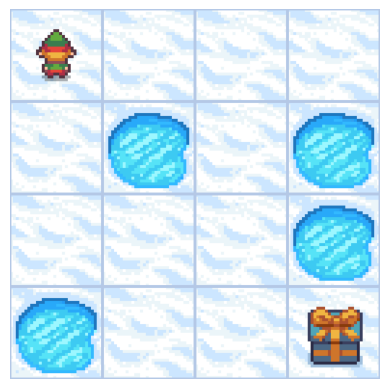

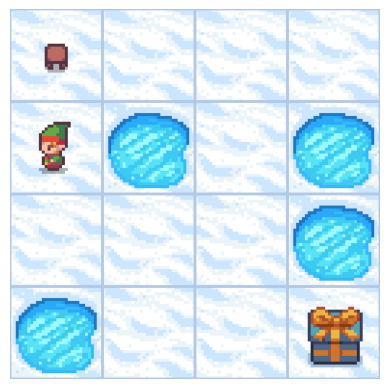

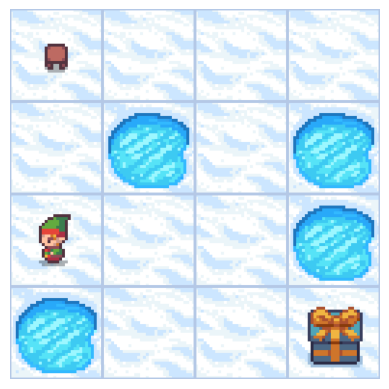

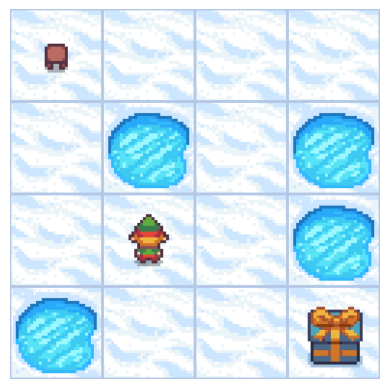

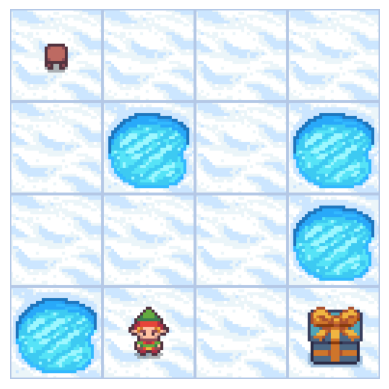

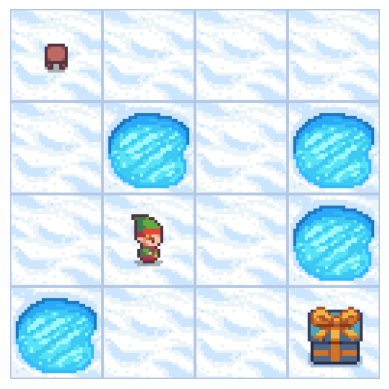

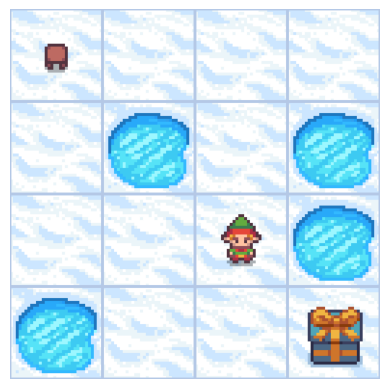

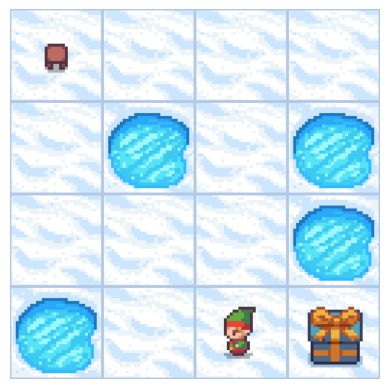

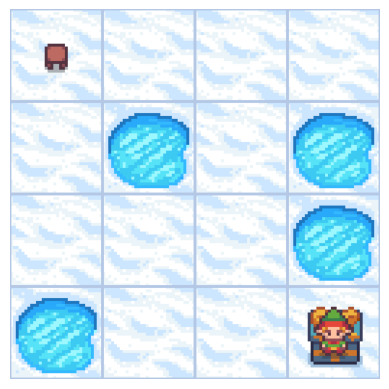

In [8]:
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")
optimal_policy, optimal_value_function = policy_iteration(env)
print("Оптимальна політика:", optimal_policy, optimal_value_function)
show_render(env, optimal_policy)
